Feature extraction in images.

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

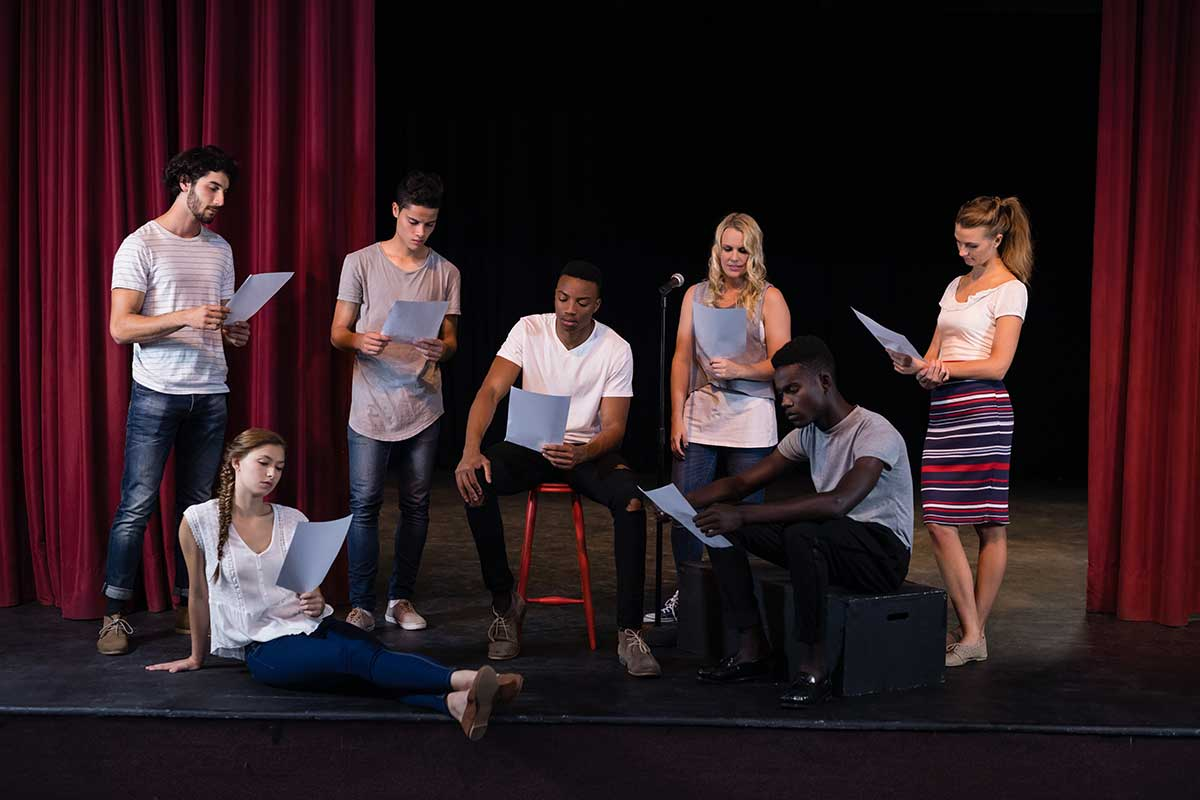

In [2]:
# Load the image
image = cv2.imread('/content/im1 (1).jpg')
image_gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image)

Statistical feature extraction:

In [5]:
# Mean, variance and standard deviation of the image:
mean = np.mean(image)
variance = np.var(image)
std_dev = np.std(image)

# Calculate the skewness and kurtosis of the image
skewness = np.mean((image - mean) ** 3) / (std_dev ** 3)
kurtosis = np.mean((image - mean) ** 4) / (std_dev ** 4) - 3

print('Mean: ',mean)
print('Variance: ', variance)
print('Asymmetry: ', skewness)
print('Kurtosis: ', kurtosis)

Mean:  38.761384722222225
Variance:  2731.3368863603223
Asymmetry:  2.0016372025878852
Kurtosis:  3.3832072867268304


Métodos de puntos clave:

[0.93883833 0.09370013 0.07901489 ... 0.10453892 0.30288756 0.        ]
SIFT Key Points:


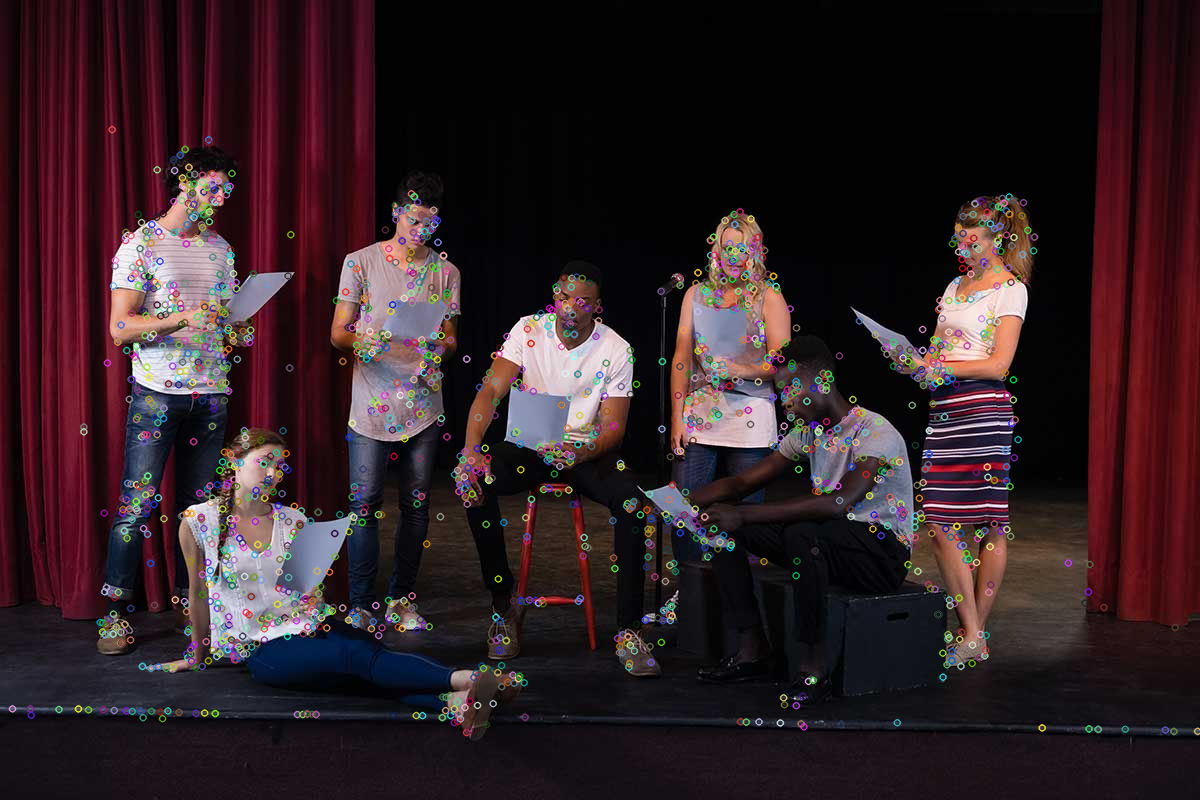

ORB Key Points:


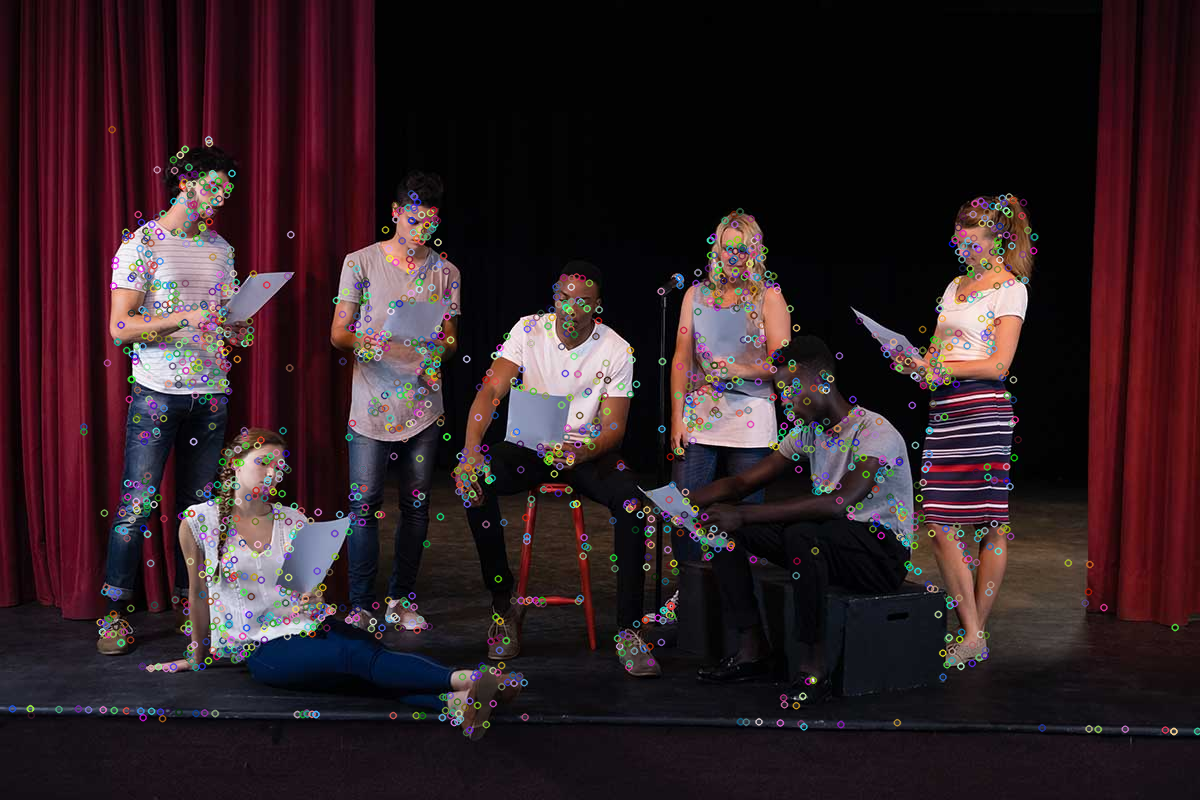

In [4]:
#1. Histogram of Oriented Gradients (HOG) Features:
from skimage.feature import hog
hog_features = hog(image_gray, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False)

print(hog_features)

#2. Scale Invariant Feature Transform (SIFT):
sift = cv2.SIFT_create()
kp_sift, des_sift = sift.detectAndCompute(image_gray,None)

#3. Oriented Fast and Rotated Brief (ORB):
orb = cv2.ORB_create(nfeatures=1500)
kp_orb, des_orb = orb.detectAndCompute(image_gray, None)

image_sift=cv2.drawKeypoints(image,kp_sift,None)
image_orb=cv2.drawKeypoints(image,kp_sift,None)

print('SIFT Key Points:')
cv2_imshow(image_sift)
print('ORB Key Points:')
cv2_imshow(image_orb)


Texture feature extraction:

In [6]:
# Load the image:
image = cv2.imread('/content/im1 (1).jpg')
image_gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#1. Gray Level Co-occurrence Matrix (GLCM):
import skimage

# Calculate GLCM
distances = [1, 2, 3] # Distances between pixels
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]# Angles between pixels
glcm = skimage.feature.graycomatrix(image_gray, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)

# Calculate some texture features of the GLCM:
contrast = skimage.feature.graycoprops(glcm, 'contrast')
correlation = skimage.feature.graycoprops(glcm, 'correlation')
energy = skimage.feature.graycoprops(glcm, 'energy')
homogeneity = skimage.feature.graycoprops(glcm, 'homogeneity')

print('Contraste GLCM: ',contrast)
print('Correlation GLCM: ',correlation)
print('Energy GLCM: ',energy)
print('Homogeneidad GLCM: ',homogeneity)


Contraste GLCM:  [[ 90.17953399 199.16667624 124.77845223 186.18193196]
 [236.24807283 199.16667624 289.46241541 186.18193196]
 [351.81627193 427.22313296 372.67508887 405.88154443]]
Correlation GLCM:  [[0.98177232 0.95978118 0.97478317 0.96240326]
 [0.9522852  0.95978118 0.94155708 0.96240326]
 [0.92899902 0.91387727 0.92482763 0.91817947]]
Energy GLCM:  [[0.18847016 0.18414814 0.19292606 0.18413281]
 [0.18314464 0.18414814 0.18797555 0.18413281]
 [0.18038319 0.17860901 0.18549558 0.17861853]]
Homogeneidad GLCM:  [[0.55680259 0.4767549  0.64960701 0.47775955]
 [0.46948185 0.4767549  0.57420413 0.47775955]
 [0.43124917 0.40004857 0.5372233  0.40116776]]


In [8]:
# 2. Local binary Patterns (LBP):

from skimage.feature import local_binary_pattern

# Calculate the LBP descriptor:
radius = 1 # radius of the circle of neighbors
n_points = 8 # number of neighboring pixels to compare
lbp = local_binary_pattern(image_gray, n_points, radius, method='uniform')

# Compute the histogram descriptor of the LBP descriptor:
hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
# Statistical characteristics can also be calculated: mean, variance, etc.

# Normalize the histogram:
hist = hist.astype('float') / hist.sum()
print('Histogram LBP:',hist)


Histogram LBP: [0.01345625 0.03690729 0.016175   0.05492604 0.10882396 0.24588021
 0.04189688 0.04132708 0.38150833 0.05909896]


In [9]:
#3. Gabor Filter:

# Filter parameters:
ksize = 31
sigma = 5
theta = 0
lambda_ = 10
gamma = 0.5
psi = 0

# The response of the Gabor filter is computed
gabor = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambda_, gamma, psi)
i_gabor = cv2.filter2D(image_gray, -1, gabor)

# The mean and variance of the filtered image are calculated:
mean = np.mean(i_gabor)
variance = np.var(i_gabor)
print('Mean Gabor:', mean)
print('Variance Gabor:', variance)

Mean Gabor: 82.31710104166666
Variance Gabor: 10161.686891721038
